# Customer Churn - Exploratory Data Analysis

This notebook performs a quick exploratory analysis of the Telco Customer Churn dataset.


In [3]:
# Imports and configuration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

# Paths
DATA_PATH = os.path.join('Data', 'Telco_Customer_Churn_Dataset  (1).csv')

# Load data
try:
    df = pd.read_csv(DATA_PATH)
except FileNotFoundError:
    # Fallback relative to repo root when run from different CWDs
    df = pd.read_csv(os.path.join('..', DATA_PATH))

print('Shape:', df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Basic info and describe
from io import StringIO

# Info
buf = StringIO()
df.info(buf=buf)
print(buf.getvalue())

# Describe numeric
display(df.describe())

# Columns and dtypes
display(pd.DataFrame({'column': df.columns, 'dtype': df.dtypes.astype(str)}))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,column,dtype
customerID,customerID,object
gender,gender,object
SeniorCitizen,SeniorCitizen,int64
Partner,Partner,object
Dependents,Dependents,object
tenure,tenure,int64
PhoneService,PhoneService,object
MultipleLines,MultipleLines,object
InternetService,InternetService,object
OnlineSecurity,OnlineSecurity,object


In [5]:
# Missing values summary
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
miss_df = pd.DataFrame({'missing': missing, 'missing_%': missing_pct})
display(miss_df[miss_df['missing'] > 0])


,missing,missing_%


Target value counts:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

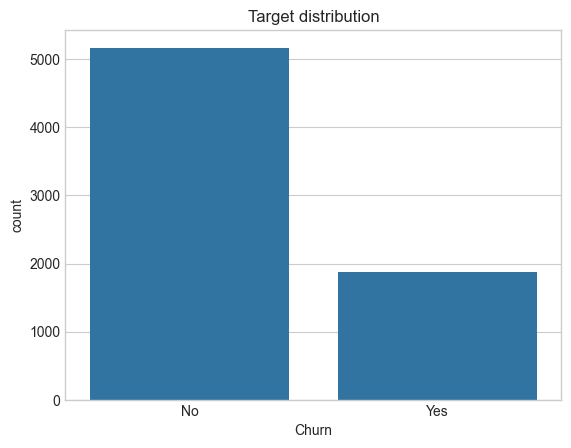

In [6]:
# Target distribution (if present)
target_col = 'Churn' if 'Churn' in df.columns else None
if target_col:
    print('Target value counts:')
    display(df[target_col].value_counts(dropna=False))
    sns.countplot(x=df[target_col])
    plt.title('Target distribution')
    plt.show()
else:
    print('No target column named "Churn" found.')


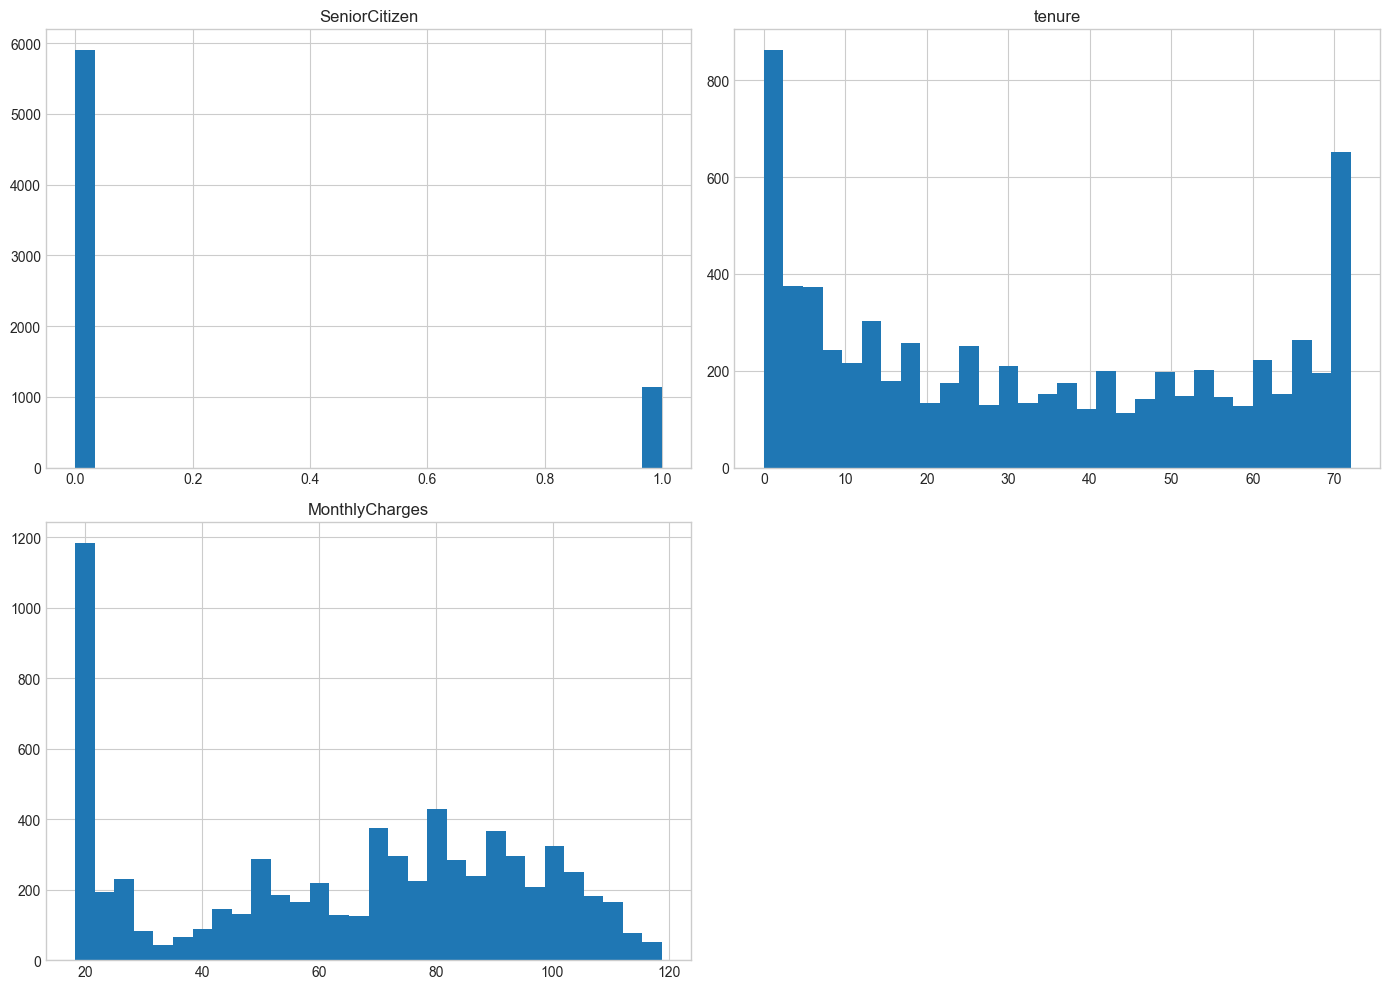

In [7]:
# Numerical distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    df[num_cols].hist(bins=30, figsize=(14, 10))
    plt.tight_layout()
    plt.show()
else:
    print('No numerical columns found.')


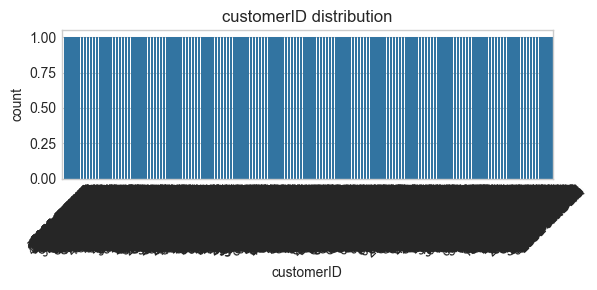

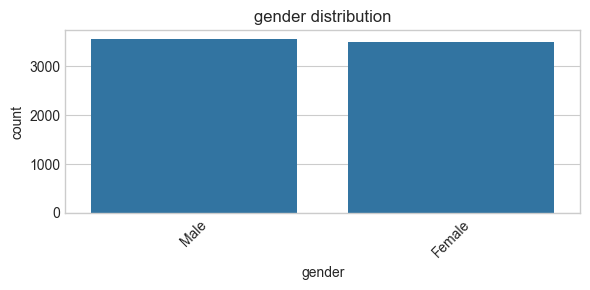

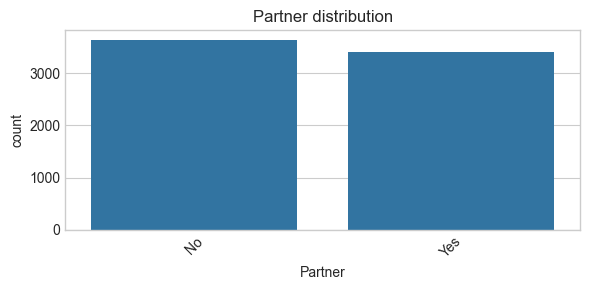

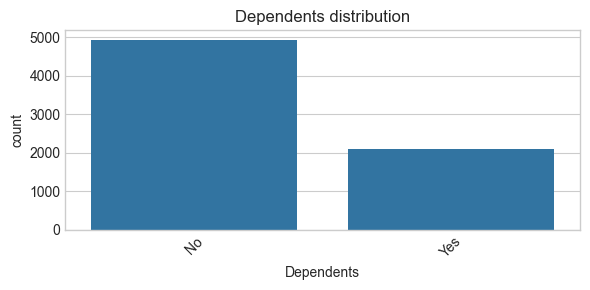

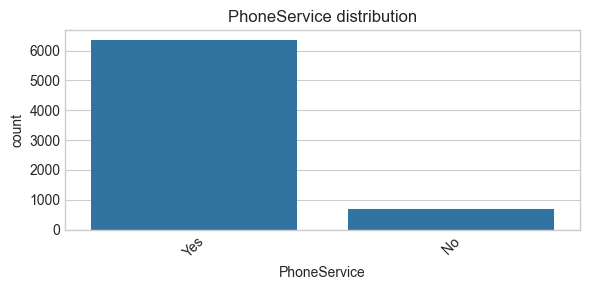

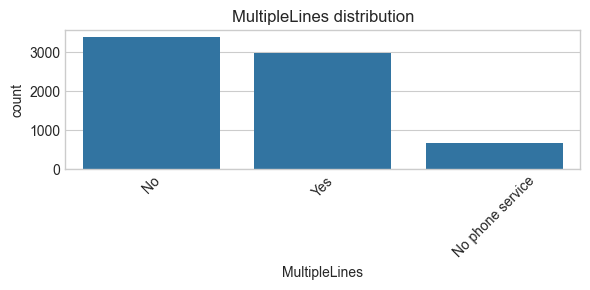

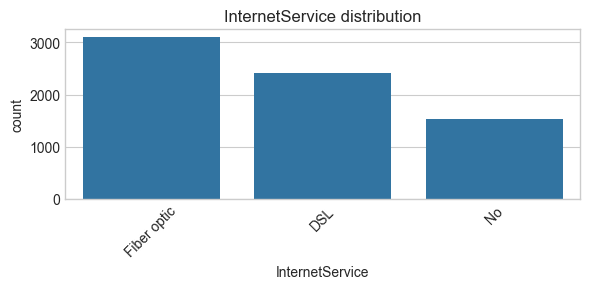

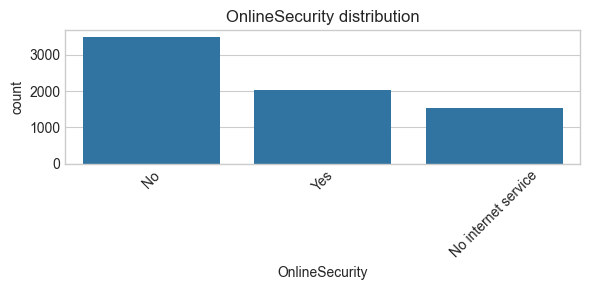

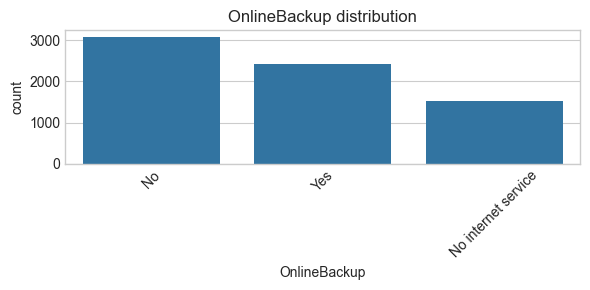

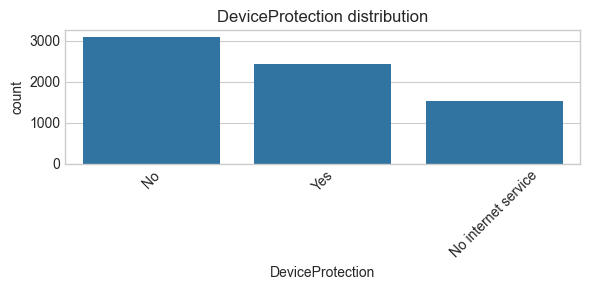

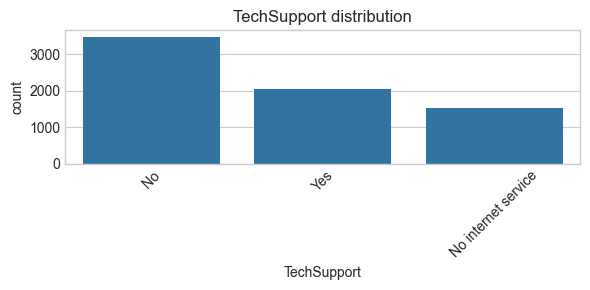

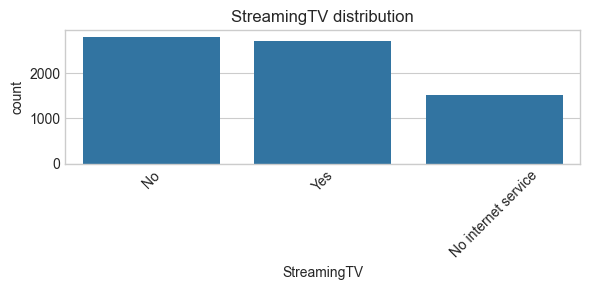

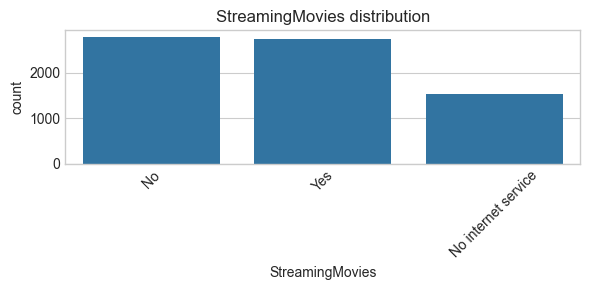

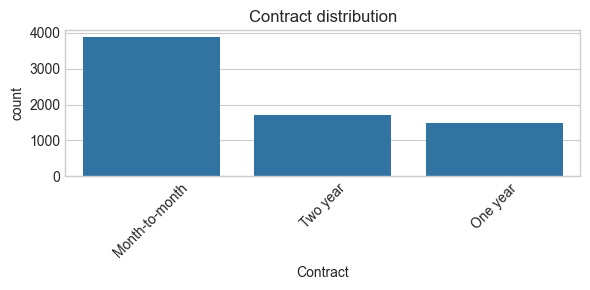

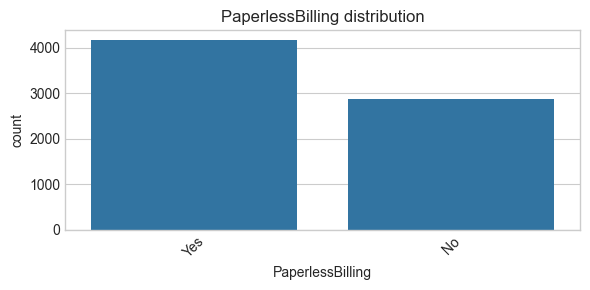

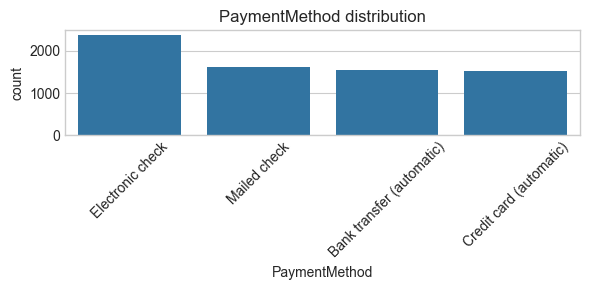

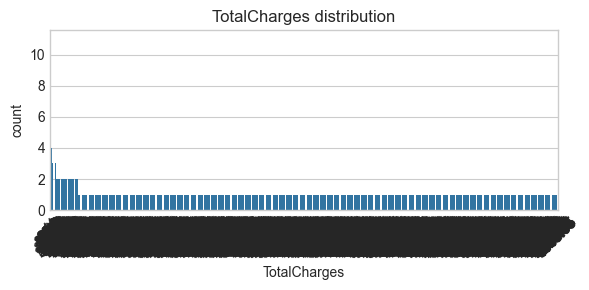

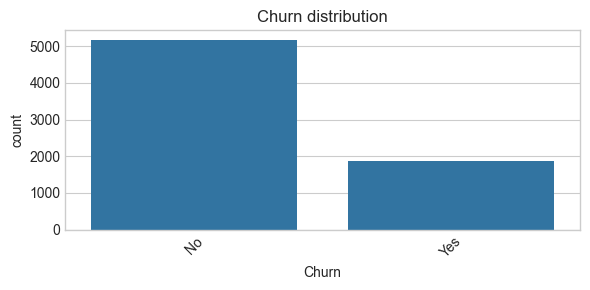

In [8]:
# Categorical distributions
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'{col} distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


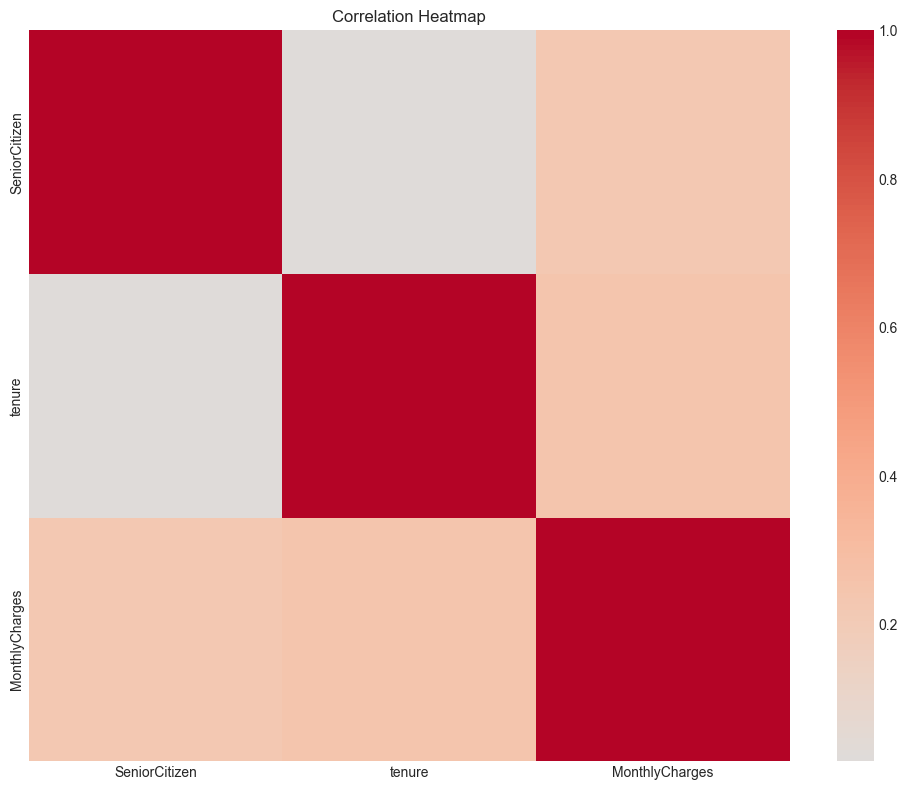

In [9]:
# Correlation heatmap for numeric features
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numerical columns for correlation heatmap.')
